In [3]:
!pip install split-folders
!pip install imutils
!pip install pydot
!pip install graphviz


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Mahmoud Zaghloul\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Mahmoud Zaghloul\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Mahmoud Zaghloul\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Mahmoud Zaghloul\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Mahmoud Zaghloul\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [5]:
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Mahmoud Zaghloul\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss, classification_report
from sklearn.model_selection import train_test_split
from imutils import paths

import matplotlib.pyplot as plt
import seaborn as sb
import splitfolders
import cv2
import random

In [3]:
inputFolder = 'D:\\GradationProject\\dataset'
outputFolder = 'D:\\GradationProject\\CT-Dataset'

In [7]:
splitfolders.ratio(inputFolder, outputFolder, seed = 44, ratio = (0.8, 0.0, 0.2))

Copying files: 12000 files [04:10, 47.91 files/s] 


In [14]:
imgPaths = list(paths.list_images(outputFolder))
random.shuffle(imgPaths)
classes = ['Cyst', 'Normal', 'Stone', 'Tumor']


x_train = []
y_train = []

x_test = []
y_test = []

IMGSIZE = 128
img_names = []

for imgPath in imgPaths:
  trainOrTest = imgPath.split('\\')[-3]
  className = imgPath.split('\\')[-2]

  img = cv2.imread(imgPath) 
  img = cv2.resize(img, (IMGSIZE,IMGSIZE))

  if trainOrTest == 'train':
    x_train.append(img)
    y_train.append(classes.index(className))
    img_names.append(imgPath.split('\\')[-1])

  elif trainOrTest == 'test':
    x_test.append(img)
    y_test.append(classes.index(className))

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))


9600 9600
2400 2400


<Axes: ylabel='count'>

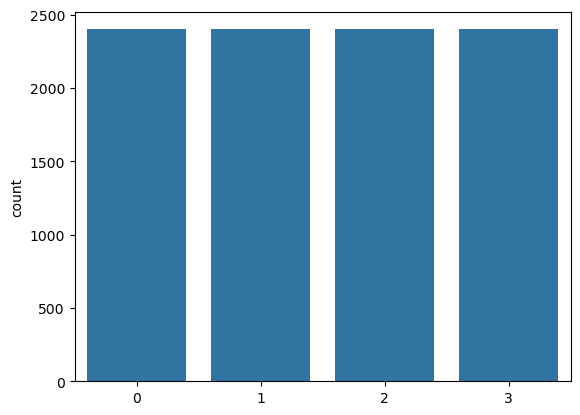

In [15]:
sb.countplot(x = y_train)

<Axes: ylabel='count'>

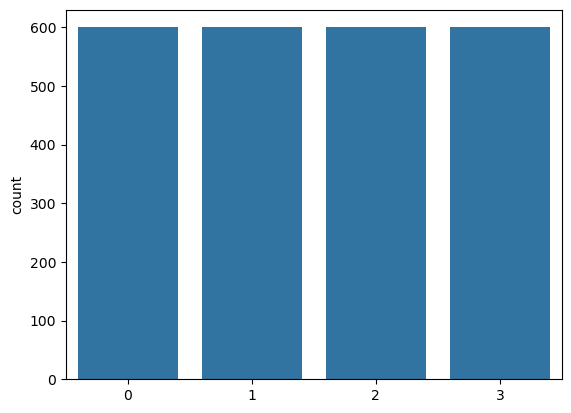

In [16]:
sb.countplot(x = y_test)

In [17]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (IMGSIZE, IMGSIZE, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))



D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 25)

Epoch 1/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 126s 369ms/step - accuracy: 0.5581 - loss: 10.6654 - val_accuracy: 0.8850 - val_loss: 0.2763
Epoch 2/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 110s 367ms/step - accuracy: 0.8937 - loss: 0.2650 - val_accuracy: 0.9258 - val_loss: 0.1638
Epoch 3/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 109s 363ms/step - accuracy: 0.9303 - loss: 0.1692 - val_accuracy: 0.9575 - val_loss: 0.0983
Epoch 4/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 142s 363ms/step - accuracy: 0.9447 - loss: 0.1370 - val_accuracy: 0.9663 - val_loss: 0.0754
Epoch 5/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 143s 364ms/step - accuracy: 0.9683 - loss: 0.0897 - val_accuracy: 0.9658 - val_loss: 0.0854
Epoch 6/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 109s 365ms/step - accuracy: 0.9708 - loss: 0.0776 - val_accuracy: 0.9696 - val_loss: 0.0703
Epoch 7/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 109s 364ms/step - accuracy: 0.9766 - loss: 0.0636 - val_accuracy: 0.9754 - val_loss: 0.0681
Epoch 8/25
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 272ms/step - accuracy: 0.9807 -

In [44]:
y_pred = model.predict(x_test)
model.summary()

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,672,334 (75.04 MB)

 Trainable params: 6,557,444 (25.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,114,890 (50.03 MB)

In [28]:
model.save('D:\\GradationProject\\model4.h5')

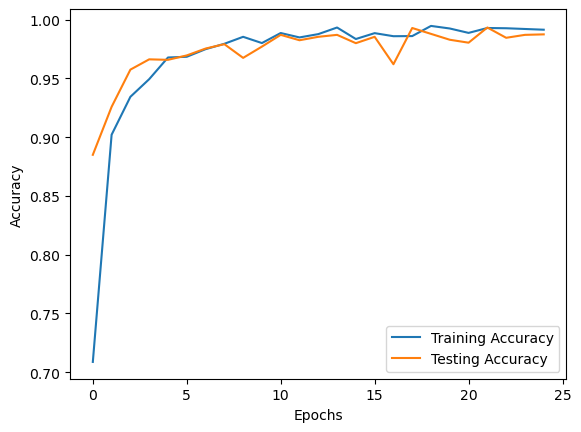

In [34]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

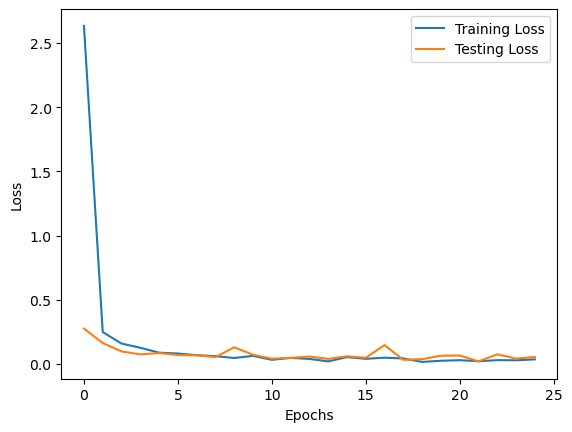

In [36]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
print(classes)
print(y_test[:25], '\n')
print(y_pred[:25], '\n')

predict = []
for i in range(2400):
  predict.append(np.argmax(y_pred[i]))

print(predict[:25], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol, '\n')

cr = classification_report(y_test, predict)
print(cr)

['Cyst', 'Normal', 'Stone', 'Tumor']
[0 3 2 2 0 3 3 0 0 2 2 0 0 1 1 0 1 0 3 2 0 1 3 0 2] 

[[1.00000000e+00 2.64151349e-22 6.64960171e-17 6.37739915e-15]
 [2.22396039e-08 7.87535384e-11 3.35461769e-09 1.00000000e+00]
 [1.17533879e-15 9.28624200e-09 1.00000000e+00 5.03985281e-14]
 [1.45922354e-11 6.06709591e-07 9.99999404e-01 4.16148060e-10]
 [1.00000000e+00 1.68007491e-20 1.86606652e-15 1.06859943e-08]
 [1.38549683e-06 4.50847466e-08 1.93493555e-09 9.99998569e-01]
 [1.10435998e-08 1.05611090e-13 5.00275955e-14 1.00000000e+00]
 [1.00000000e+00 8.68430623e-24 6.13508435e-19 1.50682071e-11]
 [1.00000000e+00 6.27280496e-38 7.86579054e-30 1.94798527e-19]
 [5.60883547e-21 1.84071985e-12 1.00000000e+00 5.28973988e-20]
 [1.49880275e-09 7.39077441e-05 9.99926090e-01 9.75282699e-09]
 [1.00000000e+00 3.75103169e-19 6.37331349e-15 2.01574335e-09]
 [1.00000000e+00 5.06481869e-15 7.85950298e-12 1.39744505e-09]
 [2.36849640e-15 1.00000000e+00 1.12189535e-10 9.16614441e-12]
 [1.96374293e-19 1.00000000

<Figure size 500x500 with 0 Axes>

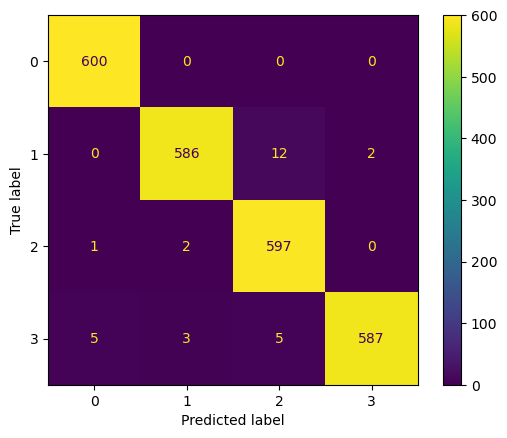

In [48]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

<Axes: ylabel='count'>

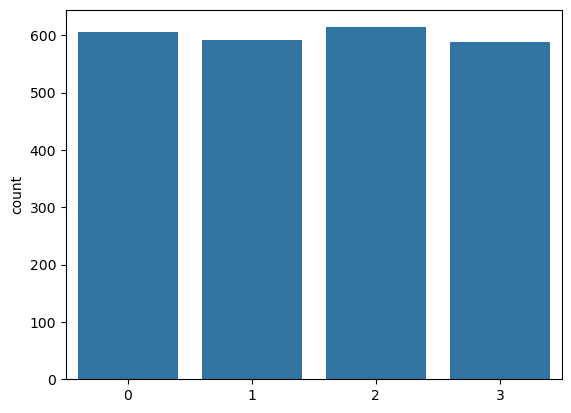

In [50]:
sb.countplot(x = predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[2.6937969e-15 2.1020939e-10 1.0000000e+00 4.5417737e-14]]
['Cyst', 'Normal', 'Stone', 'Tumor']


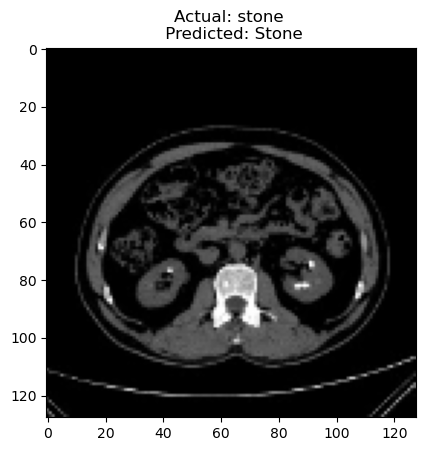

In [98]:
test_img_path = 'D:\\GradationProject\\CT-Dataset\\test\\Tumor\\kidney-tumor-0065.jpg'
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (IMGSIZE,IMGSIZE))


plt.imshow(test_img)

test_img = test_img[tf.newaxis, ...]
test_predict = model.predict(test_img)

str1 = test_img_path.split('\\')[-1].split('-')[-2]
str2 = classes[np.argmax(test_predict)]

plt.title('Actual: ' + str1 + ' ' +  '\n Predicted: ' + str2)

print(test_predict)
print(classes)
plt.show()